In [5]:
# Upload kaggle.json
from google.colab import files
files.upload()

# Move and secure key
!mkdir -p ~/.kaggle
!cp "/content/kaggle (5).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Install kaggle CLI
!pip install -q kaggle

# Download and unzip the dataset
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset
!unzip face-expression-recognition-dataset.zip -d /content/dataset

# Check contents
!ls /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/images/validation/fear/8818.jpg  
  inflating: /content/dataset/images/validation/fear/886.jpg  
  inflating: /content/dataset/images/validation/fear/9037.jpg  
  inflating: /content/dataset/images/validation/fear/9040.jpg  
  inflating: /content/dataset/images/validation/fear/9101.jpg  
  inflating: /content/dataset/images/validation/fear/911.jpg  
  inflating: /content/dataset/images/validation/fear/9179.jpg  
  inflating: /content/dataset/images/validation/fear/9205.jpg  
  inflating: /content/dataset/images/validation/fear/9232.jpg  
  inflating: /content/dataset/images/validation/fear/9251.jpg  
  inflating: /content/dataset/images/validation/fear/9261.jpg  
  inflating: /content/dataset/images/validation/fear/9281.jpg  
  inflating: /content/dataset/images/validation/fear/9302.jpg  
  inflating: /content/dataset/images/validation/fear/9333.jpg  
  inflating: /content/dataset/images/validation/fear/93

# Importing Libraries

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

Looking in: /content/dataset/images/train/angry
Files in directory: ['16520.jpg', '33580.jpg', '14221.jpg', '2325.jpg', '27620.jpg']


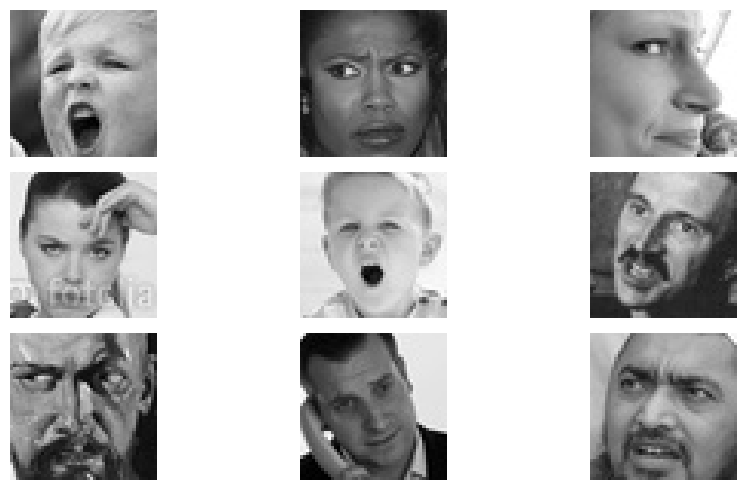

In [21]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Adjust based on what os.walk shows
folder_path = "/content/dataset/images"  # change to match your actual structure
expression = "angry"
picture_size = 48

img_path = os.path.join(folder_path, "train", expression)
print("Looking in:", img_path)

# Optional: list available files to make sure it works
print("Files in directory:", os.listdir(img_path)[:5])

plt.figure(figsize=(10, 5))
for i in range(9):
    file_name = os.listdir(img_path)[i]
    full_path = os.path.join(img_path, file_name)
    img = load_img(full_path, target_size=(picture_size, picture_size))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()


# Making Training and Validation Data

In [23]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

picture_size = 48
batch_size  = 128

# ✅ Correct folder path based on real dataset structure
folder_path = "/content/dataset/images"  # Adjust if needed

# Create data generators
datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)

# ✅ Use os.path.join to avoid broken paths
train_dir = os.path.join(folder_path, "train")
val_dir = os.path.join(folder_path, "validation")

# Load training data
train_set = datagen_train.flow_from_directory(
    train_dir,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Load validation/test data
test_set = datagen_val.flow_from_directory(
    val_dir,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [25]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate = 0.0001),loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

# Fitting the Model with Training and Validation Data

In [26]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer =Adam(learning_rate = 0.0001),
              metrics=['accuracy'])

In [28]:
history = model.fit(
    train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=callbacks_list
)


Epoch 1/48


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.2186 - loss: 2.1082 - val_accuracy: 0.1727 - val_loss: 1.9426 - learning_rate: 1.0000e-04
Epoch 2/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.2734 - loss: 1.8190

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2734 - loss: 1.8190 - val_accuracy: 0.1727 - val_loss: 1.9426 - learning_rate: 1.0000e-04
Epoch 3/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.2733 - loss: 1.8580 - val_accuracy: 0.1773 - val_loss: 1.9062 - learning_rate: 1.0000e-04
Epoch 4/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3750 - loss: 1.6061 - val_accuracy: 0.1761 - val_loss: 1.9084 - learning_rate: 1.0000e-04
Epoch 5/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.3207 - loss: 1.7613 - val_accuracy: 0.3196 - val_loss: 1.7653 - learning_rate: 1.0000e-04
Epoch 6/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3359 - loss: 1.7371 - val_accuracy: 0.3192 - val_loss: 1.7636 - learning_rate: 1.0000e-04
Epoch 7/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.3506 - loss: 1.6852 - val_accuracy: 0.3825 - val_loss: 1.6072 - learning_rate: 1.0000e-04
Epoch 8/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.33

# Plotting Accuracy & Loss

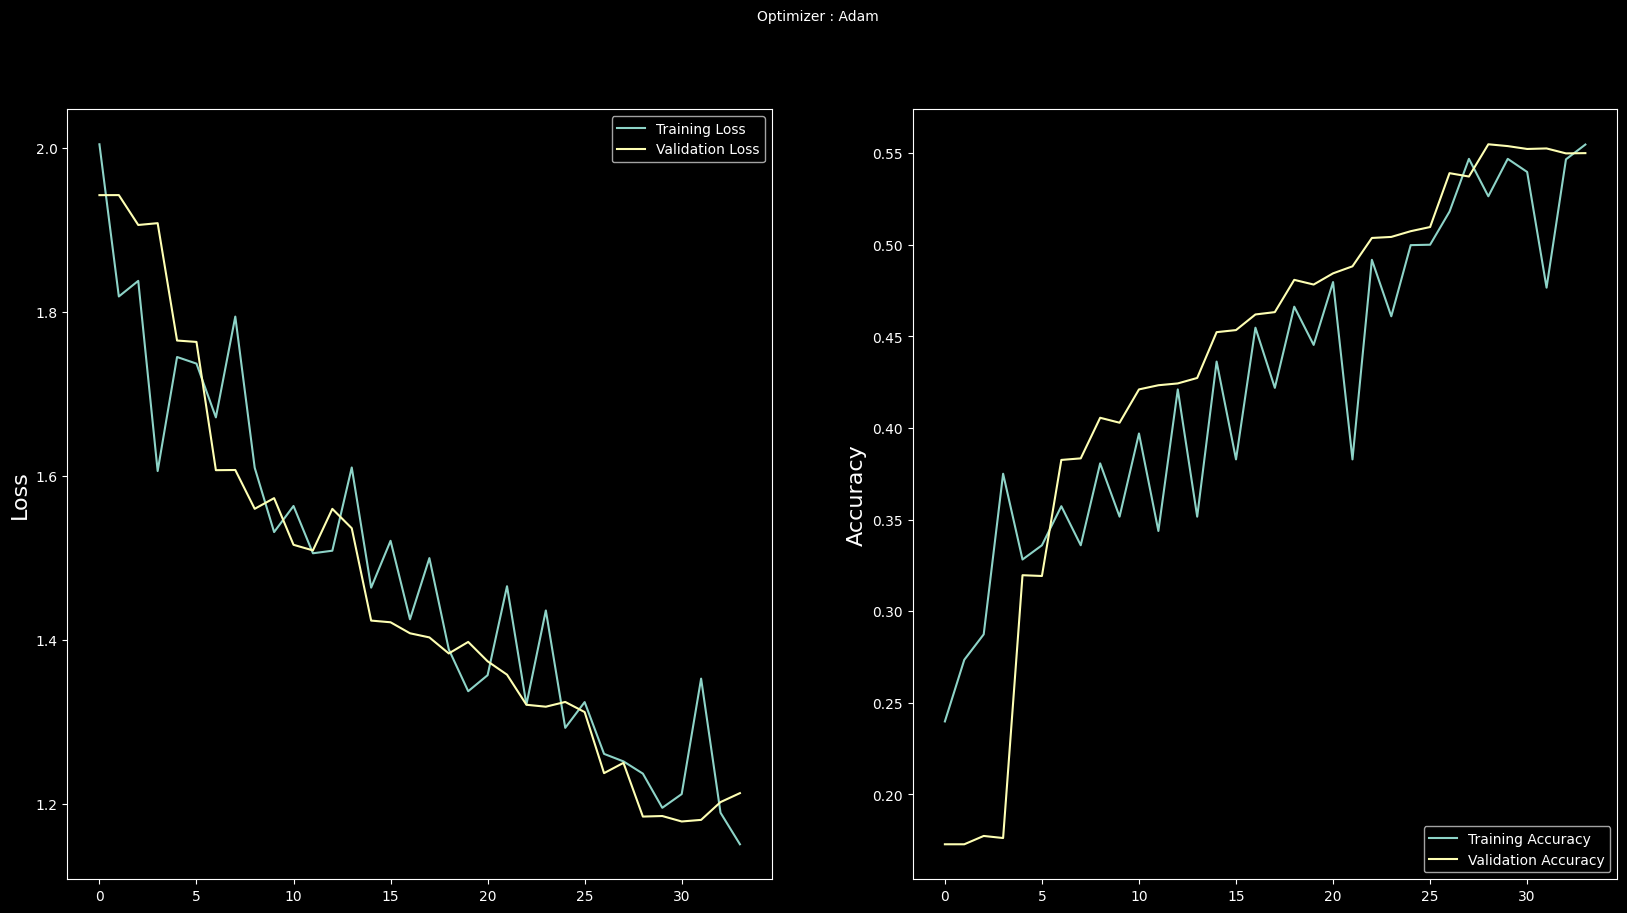

In [30]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [32]:
model.save("emotion_model.h5")


In [33]:
from google.colab import files
files.download("emotion_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>